## Libraries

In [90]:
## !pip install pandas
## !pip install mlxtend

## !pip install onnxmltools

## !pip install onnxruntime

In [265]:
import numpy as np
import torch
import pandas as pd
## pandas lib could work csv file

import sklearn
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [266]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split 
from torch.utils.data import TensorDataset, DataLoader

## standard metrics in regression
## coefficeint in determination
from sklearn.metrics import r2_score


In [267]:

import xgboost as xgb


In [268]:

import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType


## Read data 

In [271]:

path_data = 'city_day.csv'

Air_raw_data = pd.read_csv (path_data) ##, delimiter = ";")

## WINE_raw_data -d csv file iig duudaj ugj bn.

In [272]:
Air_raw_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
1,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
3,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
4,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
6232,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
6233,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
6234,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [304]:
## headers_list

headers_list = Air_raw_data.columns.values.tolist ()
##csv file iin header deer bga medeelliig avj list helberluu shiljuulj label hiihdee ashiglahad beldej bna

##headers_list

headers_list1 = headers_list [:-1]
headers_list1

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

## Data Analysis

* Correlation Matrix


<function matplotlib.pyplot.show(close=None, block=None)>

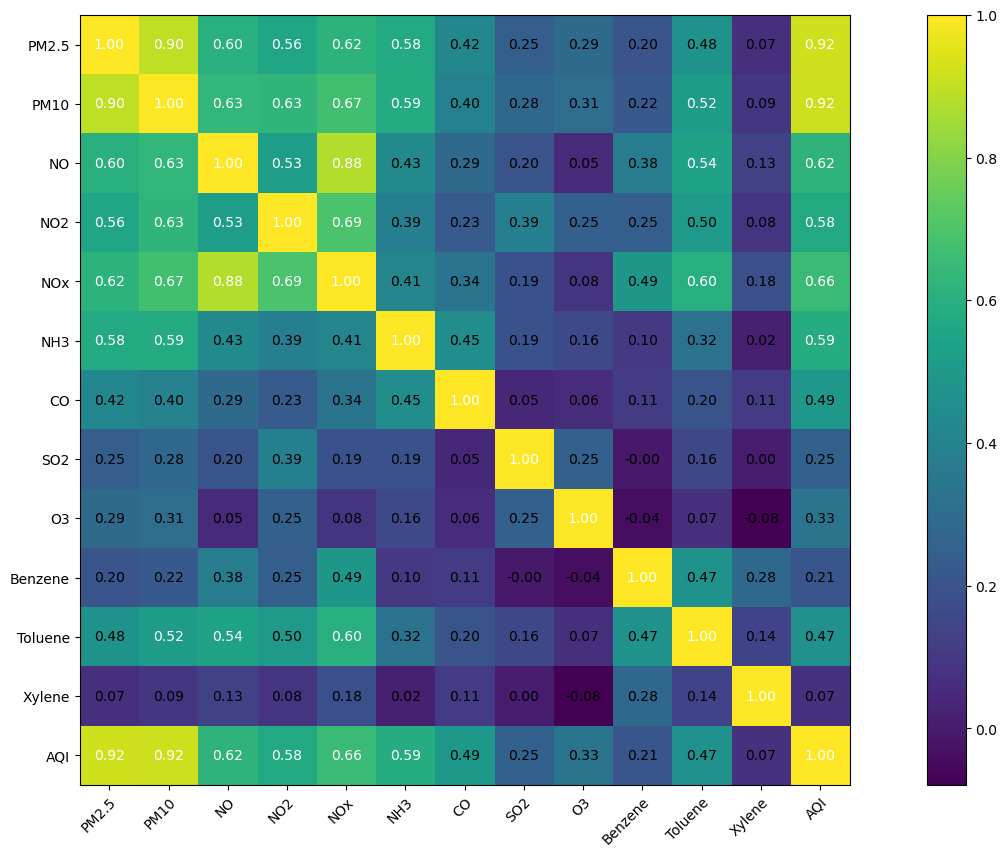

In [306]:
cm = np.corrcoef ( Air_raw_data[headers_list1].values.T  )
hm = heatmap (cm, row_names = headers_list1, column_names = headers_list1, figsize= (20,10))
## heatmap in doorhi turlii medeelliig haruuldag function.
## if value was 1, those values have positive correlation 
## if value was -1, those values have negative correlation
## if value was 0, there is no correlation between 2 values
## doorhi uzuulsen medeellees quality bolon alcohol 2 iin hoorondin hamaaral hamgiin undur bga gesen medeelel harj boloh n, column quality iin hamgiin undur utga avsan n 0.44 alcohol bn

plt.show

## Process Data

In [307]:
## Convert Pandas to Numpy
## CSV filed bsan datag Pandas aar unshij avsan bsanaa Numpy ruu hurvuulj deer n ajillahad beldej bn

Air_raw_data_np = Air_raw_data.to_numpy()


In [308]:
Air_raw_data_np

array([[81.4, 124.5, 1.44, ..., 0.06, 184.0, 'Moderate'],
       [78.32, 129.06, 1.26, ..., 0.08, 197.0, 'Moderate'],
       [88.76, 135.32, 6.6, ..., 0.12, 198.0, 'Moderate'],
       ...,
       [24.38, 74.09, 3.42, ..., 0.38, 70.0, 'Satisfactory'],
       [22.91, 65.73, 3.45, ..., 0.0, 68.0, 'Satisfactory'],
       [16.64, 49.97, 4.05, ..., 0.0, 54.0, 'Satisfactory']], dtype=object)

In [309]:
Air_raw_data_np.shape

(6236, 14)

In [353]:
## indexing data

X = Air_raw_data_np [:, :-2]
## , buh row iig avna. columns aas suuliin negees busdiin songoj avna (slicing)

y = Air_raw_data_np [:,12:13]
## hamgiin suuliin baganii buh muriig avna.

z = Air_raw_data_np [:,12:14]



In [355]:
print (X.shape)
print (y.shape)


print (y)

z

(6236, 12)
(6236, 1)
[[184.0]
 [197.0]
 [198.0]
 ...
 [70.0]
 [68.0]
 [54.0]]


array([[184.0, 'Moderate'],
       [197.0, 'Moderate'],
       [198.0, 'Moderate'],
       ...,
       [70.0, 'Satisfactory'],
       [68.0, 'Satisfactory'],
       [54.0, 'Satisfactory']], dtype=object)

In [330]:
random_seed = int (random.random() *100) ## 42

In [331]:
## split X and y

## ugugdliin 80% iig surgaltand, uldse 20% iig surgasan model oo test hiihed ashiglana

## daraagiin epoch deer ugugdluu holiod dahin huvaana

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = random_seed)

In [332]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

print (X_train)

(4988, 12)
(1248, 12)
(4988, 1)
(1248, 1)
[[31.74 81.19 31.45 ... 9.67 17.3 2.82]
 [31.24 50.3 3.28 ... 2.38 5.34 0.74]
 [242.58 158.08 8.62 ... 3.79 8.3 8.14]
 ...
 [121.7 212.35 48.01 ... 0.99 3.39 0.09]
 [71.06 103.17 3.1 ... 4.61 7.73 3.97]
 [68.65 139.18 10.23 ... 3.62 21.6 5.69]]


## Fix in case float64 error

In [333]:
y_test.dtype ## sometimes torch gives you problem because of data had different data type 

dtype('O')

In [334]:
## fix data type

X_train = X_train.astype (np.float32)
X_test = X_test.astype (np.float32)
y_train = y_train.astype (np.float32)
y_test = y_test.astype (np.float32)

In [335]:
X_train.dtype
X_test.dtype
y_train.dtype
y_test.dtype

dtype('float32')

In [336]:
## convert data to torch from Numpy

X_train_tr = torch.from_numpy (X_train)
X_test_tr  = torch.from_numpy (X_test)
y_train_tr = torch.from_numpy (y_train)
y_test_tr  = torch.from_numpy (y_test)


## XGBoost

In [337]:

regressor = xgb.XGBRegressor (
        
        n_estimators = 100,
        reg_lambda = 1,
        gamma = 0,
        max_depth = 10

)


In [338]:

regressor.fit (X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [339]:

y_pred = regressor.predict (X_test)


In [340]:

y_pred.shape


(1248,)

In [341]:

y_pred


array([ 54.669453, 127.68533 , 105.88744 , ...,  91.05282 , 297.04138 ,
       114.6128  ], dtype=float32)

In [342]:

r2_score (y_test, y_pred)


0.9196517739840159

## Deploy XGBoost Model

* ONNX and GitHub

In [343]:

initial_types = [(
            'float_input',
            FloatTensorType( [None, 12] )

)]


In [344]:

onnx_model = onnxmltools.convert_xgboost(regressor, initial_types = initial_types)

onnxmltools.utils.save_model(onnx_model, 'xgboost_AirQuality_ort.onnx')


In [345]:

sess = rt.InferenceSession ('xgboost_AirQuality_ort.onnx')


In [346]:

input_name = sess.get_inputs () [0].name


In [347]:
input_name

'float_input'

In [348]:

label_name = sess.get_outputs ()[0].name


In [349]:
label_name

'variable'

In [350]:

pred_ort = sess.run( [label_name], {input_name: X_test.astype(np.float32) } )


In [351]:
pred_ort [0]

array([[ 54.66945 ],
       [127.68526 ],
       [105.88747 ],
       ...,
       [ 91.05282 ],
       [297.04144 ],
       [114.612816]], dtype=float32)